In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.linalg import svd
from scipy.stats import norm
from scipy.sparse.linalg import svds
import sys
import numpy as np

In [2]:
from graphstats.embed.svd import selectDim
from graphstats.simulations.simulations import binary_sbm 

In [3]:
n = [30,30,30]
p = [[0.9,0.4,0.9],[0.4,0.9,0.4],[0.9,0.4,0.9]]
p = np.array(p)

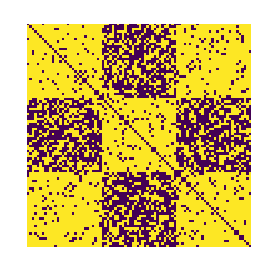

In [4]:
bsbm = binary_sbm(n,p)
plt.matshow(bsbm)
plt.axis('off')
plt.savefig('bsbm.png')
plt.show()

In [5]:
elbows, e_l, sing, all_l = selectDim(bsbm, 8)

[ 3 29 52 65 73 80 87 89]


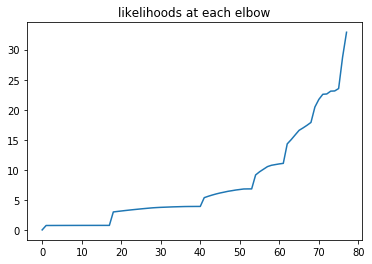

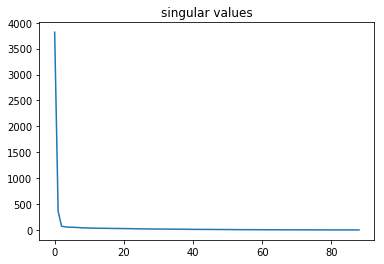

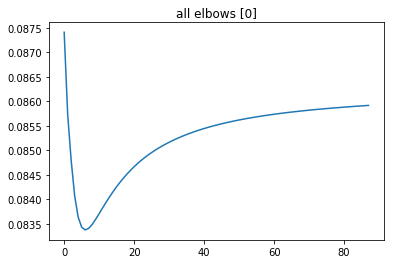

8


In [6]:
print(elbows+1)
plt.plot(e_l)
plt.title('likelihoods at each elbow')
plt.savefig('e_l.png')
plt.show()
plt.plot(sing)
plt.title('singular values')
plt.savefig('svals.png')
plt.show()
plt.plot(all_l[0])
plt.title('all elbows [0]')
plt.savefig('all_l_0.png')
plt.show()
print(len(all_l))

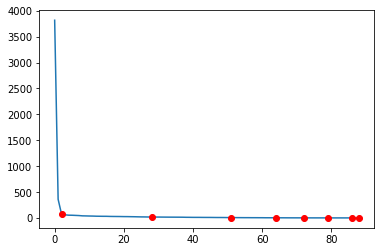

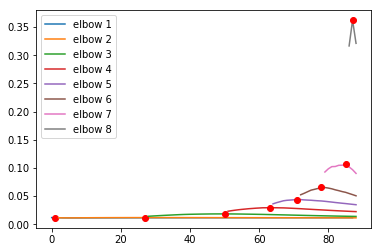

8


In [7]:
plt.plot(sing)
plt.plot(elbows,sing[elbows],'ro')
plt.savefig('elbows_svals.png')
plt.show()
for elbow in range(len(elbows)):
    if elbow == 0:
        plt.plot(range(len(all_l[elbow])),all_l[elbow]/sum(all_l[elbow]), label='elbow {}'.format(elbow+1))
    else:
        plt.plot(range(elbows[elbow-1],len(all_l[elbow])+elbows[elbow-1]),all_l[elbow]/sum(all_l[elbow]), label='elbow {}'.format(elbow+1))
    plt.plot(elbows[elbow]-1,max(all_l[elbow]/sum(all_l[elbow])),'ro')
plt.legend(loc='best')
plt.savefig('elbows_all_l')
plt.show()
print(len(all_l))

In [8]:
import nibabel as nib
file = nib.load('../921/sub-NDARAA075AMK_task-rest_bold.nii')

In [9]:
from matplotlib import animation, rc
from IPython.display import HTML
data = file.dataobj[:,:,0,:]

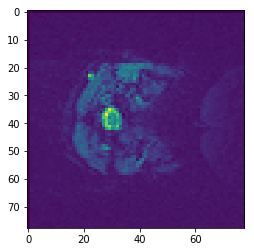

(78, 78)


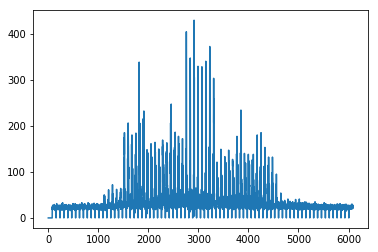

In [61]:
plt.imshow(data[:,:,0])
plt.show()
print(data[:,:,0].shape)
plt.plot(data[:,:,0].reshape(-1,1))
plt.show()

In [73]:
flat = [data[:,:,i].reshape(-1,1) for i in range(data.shape[2])]

In [78]:
y=np.array([np.array(xi) for xi in flat]).reshape(420,6084)

In [81]:
print(y.shape)
elbows, e_l, sing, all_l = selectDim(y, 8)

(420, 6084)


ValueError: matrix type must be 'f', 'd', 'F', or 'D'

In [82]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA(n_components = 3)
y3 = pca.fit_transform(y)

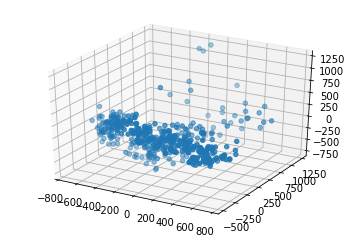

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y3[:,0], y3[:,1], y3[:,2])
plt.show()

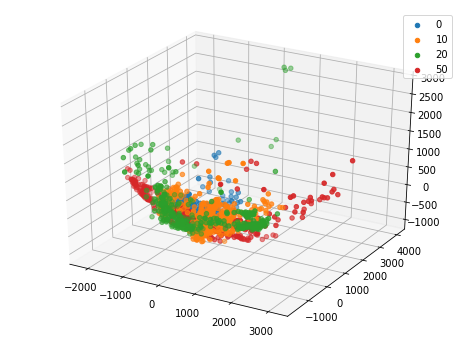

In [95]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
for j in [0,10,20,50]:
    data = file.dataobj[:,:,j,:]
    flat = [data[:,:,i].reshape(-1,1) for i in range(data.shape[2])]
    y=np.array([np.array(xi) for xi in flat]).reshape(data.shape[2],6084)
    pca = PCA(n_components = 3)
    y3 = pca.fit_transform(y)
    ax.scatter(y3[:,0], y3[:,1], y3[:,2], label=str(j))
plt.legend(loc='best')
plt.show()